# Info
Name:  

    ATDM Proposal dust heating rate

Purpose:  

    Make some figures for the ATMD proposal
    Focus on the heating rate profiles obtained during ORACLES 2018 transit back, near Cabo Verde, with SSFR
  
Input:

    None
  
Output:

    Figures
  
Keywords:

    none
  
Dependencies:

    - load_utils.py : for loading OMI HDF5 files
    - matplotlib
    - numpy
    - 
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - for_Sam_20181025.out
  
Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2019-08-23
    Modified: 

# Prepare python environment

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
import load_utils as lu
import plotting_utils as pu
from path_utils import getpath
import hdf5storage as hs
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import scipy.stats as st
import scipy.io as sio

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib notebook

In [3]:
fp =getpath('ORACLES')

Return path named:  ORACLES /mnt/c/Users/sleblanc/Research/ORACLES/


# Load files

## Load the SSFR files

In [4]:
ssfr = sio.idl.readsav(fp+'data_other_2018/SSFR/for_Sam_20181025_SSFR.out')

In [5]:
ssfr.keys()

['utc', 'zenlambda', 'nadlambda', 'shsw', 'zenspectra', 'nadspectra']

Now interpolate the nadir spectra to the zenith wavelengths

In [6]:
def interp_spline(xold, yold, ynew):
    uv = UnivariateSpline(xold,yold,ext=0,k=1)
    return uv(ynew)

In [7]:
ssfr['nadspectra'].shape

(27351, 400)

In [8]:
ssfr['nadlambda'][0:10]

array([351.99384, 355.31583, 358.63852, 361.96188, 365.28592, 368.61063,
       371.936  , 375.26196, 378.58856, 381.9158 ], dtype=float32)

In [9]:
ssfr['nspectra'] = np.array([interp_spline(ssfr['nadlambda'],ssfr['nadspectra'][i,:],ssfr['zenlambda']) for i in xrange(len(ssfr['utc']))])

In [10]:
ssfr['nspectra'].shape

(27351, 400)

In [11]:
ssfr['f_net'] = ssfr['zenspectra'] - ssfr['nadspectra']

<IPython.core.display.Javascript object>


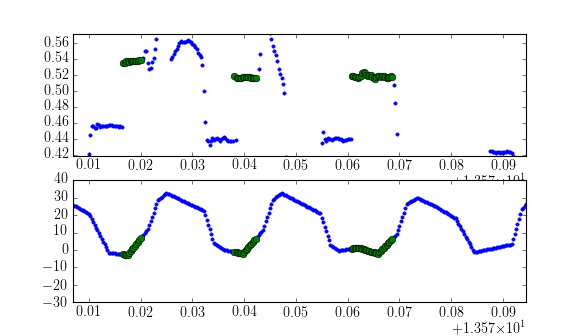

In [97]:
plt.figure()
ax = plt.subplot(2,1,1)
ax.plot(ssfr['utc'],ssfr['f_net'][:,200],'.')
ax.plot(ssfr['utc'][i_ssfr],ssfr['f_net'][i_ssfr,200],'go')

ax1 = plt.subplot(2,1,2,sharex=ax)
ax1.plot(ssfr['utc'],ssfr['roll'],'.')
ax1.plot(ssfr['utc'][i_ssfr],ssfr['roll'][i_ssfr],'go')

## Load the 4STAR file

In [12]:
s,sh = lu.load_ict(fp+'aod_ict_2018/4STAR-AOD_P3_20181025_R1.ict',return_header=True)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'flag_acaod', 'AOD_angstrom_470_865', 'AOD_polycoef_a2', 'AOD_polycoef_a1', 'AOD_polycoef_a0', 'AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0700', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'UNCAOD0355', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0700', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650')


In [13]:
sh

['94, 1001\n',
 'Samuel LeBlanc\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'ORACLES 2018\n',
 '1, 1\n',
 '2018, 10, 25, 2019, 05, 09\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20180924\n',
 '58\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 ' -9999.0000000, -9999.0000000, -9999.0, -9999, -9999.000, -9999, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, 

In [14]:
sp = sio.loadmat(fp+'data_2018/4STAR_20181025starsun.mat')

## Load the merge file

In [15]:
mrg,mrg_head = lu.load_netcdf(fp+'data_other_2018/mrg1_P3_20181025_R13.nc',everything=True)

Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/mrg1_P3_20181025_R13.nc
Outputting the Data subdatasets:
0: time
1: time_bounds
2: Start_UTC
3: Day_Of_Year
4: Latitude
5: Longitude
6: GPS_Altitude
7: Pressure_Altitude
8: Radar_Altitude
9: Ground_Speed
10: True_Air_Speed
11: Indicated_Air_Speed
12: Mach_Number
13: Vertical_Speed
14: True_Heading
15: Track_Angle
16: Drift_Angle
17: Pitch_Angle
18: Roll_Angle
19: Static_Air_Temp
20: Potential_Temp
21: Dew_Point
22: Total_Air_Temp
23: IR_Surf_Temp
24: Static_Pressure
25: Cabin_Pressure
26: Wind_Speed
27: Wind_Direction
28: Solar_Zenith_Angle
29: Aircraft_Sun_Elevation
30: Sun_Azimuth
31: Aircraft_Sun_Azimuth
32: Mixing_Ratio
33: Part_Press_Water_Vapor
34: Sat_Vapor_Press_H2O
35: Sat_Vapor_Press_Ice
36: Relative_Humidity
37: WINDS_Pitch_deg
38: WINDS_Roll_deg
39: WINDS_Tstat_degC
40: WINDS_u_ms-1
41: WINDS_v_ms-1
42: WINDS_w_ms-1
43: WINDS_WSPD_ms-1
44: qual_flag
45: amass_aer
46: AOD_angstrom_470_865
47: AOD_polycoef_a

In [16]:
ssfr['pitch'] = interp_spline(mrg['Start_UTC']/3600.0,mrg['SysPitchAng'],ssfr['utc'])
ssfr['roll'] = interp_spline(mrg['Start_UTC']/3600.0,mrg['Roll_Angle'],ssfr['utc'])

## Load the HSRL

In [17]:
hsrl,hsrl_hed = lu.load_hdf(fp+'data_other_2018/HSRL/HSRL2_P3_20181025_R1.h5',values=(('ext',33),('alt',36),('gps_alt',63),('time',66)))

Outputting the Data subdatasets:
0: [2562x460] //DataProducts/1064_aer_dep (64-bit floating-point)
1: [2562x460] //DataProducts/1064_bsc (64-bit floating-point)
2: [2562x460] //DataProducts/1064_bsc_Sa (64-bit floating-point)
3: [2562x460] //DataProducts/1064_bsc_cloud_screened (64-bit floating-point)
4: [2562x460] //DataProducts/1064_bsr (64-bit floating-point)
5: [2562x460] //DataProducts/1064_bsr_cloud_screened (64-bit floating-point)
6: [2562x460] //DataProducts/1064_dep (64-bit floating-point)
7: [2562x460] //DataProducts/1064_ext (64-bit floating-point)
8: [2562x460] //DataProducts/1064_total_attn_bsc (64-bit floating-point)
9: [2562x1] //DataProducts/355_AOT_above_cloud (64-bit floating-point)
10: [2562x1] //DataProducts/355_AOT_hi (64-bit floating-point)
11: [2562x460] //DataProducts/355_AOT_hi_col (64-bit floating-point)
12: [2562x460] //DataProducts/355_Sa (64-bit floating-point)
13: [2562x460] //DataProducts/355_aer_dep (64-bit floating-point)
14: [2562x460] //DataProducts/3

In [18]:
hsrl_hed

{'alt': {'Nav_Data_Source': 'ApplanixIMU',
  'State_source_files': '\nMERRA2_400.inst3_3d_asm_Np.20181025.nc4'},
 'ext': {'Nav_Data_Source': 'ApplanixIMU',
  'State_source_files': '\nMERRA2_400.inst3_3d_asm_Np.20181025.nc4'},
 'gps_alt': {'Nav_Data_Source': 'ApplanixIMU',
  'State_source_files': '\nMERRA2_400.inst3_3d_asm_Np.20181025.nc4'},
 'time': {'Nav_Data_Source': 'ApplanixIMU',
  'State_source_files': '\nMERRA2_400.inst3_3d_asm_Np.20181025.nc4'}}

In [19]:
hsrl['time']

array([[ 6.79402861],
       [ 6.79680639],
       [ 6.79958417],
       ...,
       [13.91847306],
       [13.92125083],
       [13.92402861]])

In [20]:
np.argmin(abs(hsrl['time']-13.535))

2421

In [21]:
hsrl['ext'].shape, hsrl['alt'].shape

((2562, 460), (1, 460))

<IPython.core.display.Javascript object>


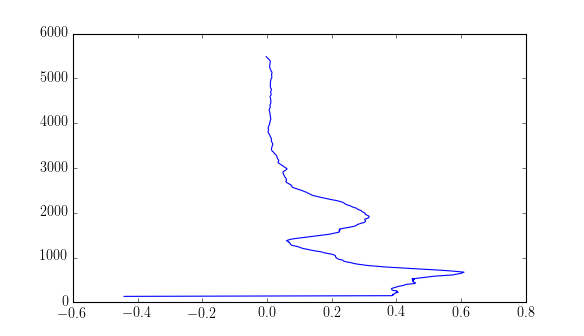

In [22]:
plt.figure()
plt.plot(hsrl['ext'][2421,:],hsrl['alt'].T)

In [22]:
plt.figure()
plt.plot(hsrl['time'],hsrl['ext'][:,200])

<IPython.core.display.Javascript object>

# Build up the plots to select the region
Do some of the calculations to the data here

Get the location of the dust profile

<IPython.core.display.Javascript object>


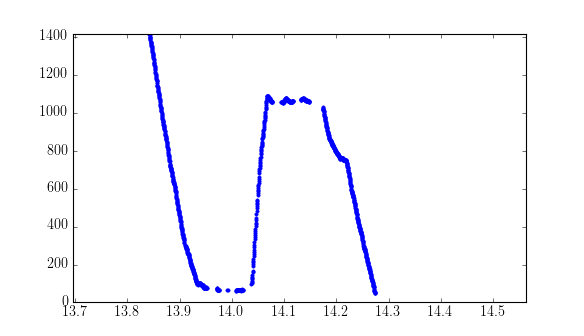

In [14]:
plt.figure()
plt.plot(s['Start_UTC'],s['GPS_Alt'],'.')

<IPython.core.display.Javascript object>


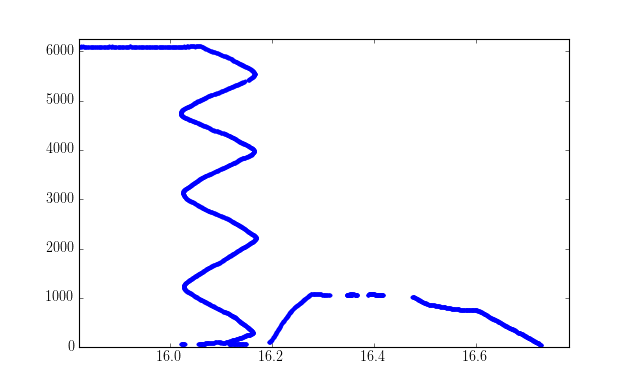

In [10]:
plt.figure()
plt.plot(s['Latitude'],s['GPS_Alt'],'.')

In [23]:
pfl = [13.565, 13.95]

In [24]:
i_s = (s['Start_UTC']>pfl[0]) & (s['Start_UTC']<pfl[1]) & (s['qual_flag']==0)

In [25]:
i_ssfr = (ssfr['utc']>pfl[0]) & (ssfr['utc']<pfl[1]) & (abs(ssfr['roll'])<7.0) & (ssfr['f_net'][:,120]>0.9)

In [26]:
ni_ssfr = np.where(i_ssfr)[0]
ds = np.where(np.diff(ni_ssfr,1)>3)[0]
disc_ssfr = ni_ssfr[ds]
is_ssfr = np.array([range(i-12,i) for i in disc_ssfr]).flatten()
is_ssfr

array([24411, 24412, 24413, 24414, 24415, 24416, 24417, 24418, 24419,
       24420, 24421, 24422, 24491, 24492, 24493, 24494, 24495, 24496,
       24497, 24498, 24499, 24500, 24501, 24502, 24586, 24587, 24588,
       24589, 24590, 24591, 24592, 24593, 24594, 24595, 24596, 24597,
       24762, 24763, 24764, 24765, 24766, 24767, 24768, 24769, 24770,
       24771, 24772, 24773, 24850, 24851, 24852, 24853, 24854, 24855,
       24856, 24857, 24858, 24859, 24860, 24861, 24945, 24946, 24947,
       24948, 24949, 24950, 24951, 24952, 24953, 24954, 24955, 24956,
       25131, 25132, 25133, 25134, 25135, 25136, 25137, 25138, 25139,
       25140, 25141, 25142, 25233, 25234, 25235, 25236, 25237, 25238,
       25239, 25240, 25241, 25242, 25243, 25244, 25339, 25340, 25341,
       25342, 25343, 25344, 25345, 25346, 25347, 25348, 25349, 25350,
       25517, 25518, 25519, 25520, 25521, 25522, 25523, 25524, 25525,
       25526, 25527, 25528, 25532, 25533, 25534, 25535, 25536, 25537,
       25538, 25539,

<IPython.core.display.Javascript object>


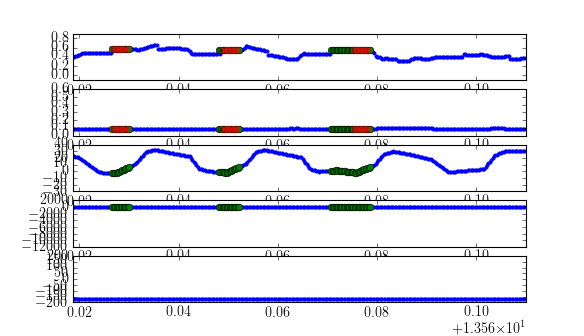

(13.5787, 13.67)

In [104]:
plt.figure()
ax = plt.subplot(5,1,1)
ax.plot(ssfr['utc'],ssfr['zenspectra'][:,200],'.')
ax.plot(ssfr['utc'][i_ssfr],ssfr['zenspectra'][i_ssfr,200],'go')
ax.plot(ssfr['utc'][is_ssfr],ssfr['zenspectra'][is_ssfr,200],'rx')

ax0 = plt.subplot(5,1,2,sharex=ax)
ax0.plot(ssfr['utc'],ssfr['nspectra'][:,200],'.')
ax0.plot(ssfr['utc'][i_ssfr],ssfr['nspectra'][i_ssfr,200],'go')
ax0.plot(ssfr['utc'][is_ssfr],ssfr['nspectra'][is_ssfr,200],'rx')

ax1 = plt.subplot(5,1,3,sharex=ax)
ax1.plot(ssfr['utc'],ssfr['roll'],'.')
ax1.plot(ssfr['utc'][i_ssfr],ssfr['roll'][i_ssfr],'go')

ax2 = plt.subplot(5,1,4,sharex=ax)
ax2.plot(ssfr['utc'],ssfr['pitch'],'.')
ax2.plot(ssfr['utc'][i_ssfr],ssfr['pitch'][i_ssfr],'go')
ax2.set_xlim(13.5787,13.67)

ax3 = plt.subplot(5,1,5,sharex=ax)
ax3.plot(mrg['Start_UTC']/3600.0,mrg['Sun_Azimuth'],'.')
#ax3.plot(ssfr['utc'][i_ssfr],ssfr['pitch'][i_ssfr],'go')
ax3.set_xlim(13.5787,13.67)

In [27]:
ssfr['alt'] = interp_spline(mrg['Start_UTC']/3600.0,mrg['GPS_Altitude'],ssfr['utc'])

In [105]:
ssfr['alt'][1:100]

array([ 23.02712973,  22.91377763,  22.80023077,  22.68687867,
        22.57333181,  22.45997971,  22.34643285,  22.23308075,
        22.11953389,  22.00618179,  21.89263493,  21.77928283,
        21.66573597,  21.55218911,  21.43883701,  21.32529015,
        21.21193805,  21.09839119,  20.98503909,  20.87149223,
        20.75814013,  20.64459327,  20.53124117,  20.41769431,
        20.30414744,  20.19079534,  20.07726341,  19.98718035,
        19.8969425 ,  19.80685943,  19.71662159,  19.62653852,
        19.53630068,  19.44621761,  19.35597977,  19.26574192,
        19.17565886,  19.08542101,  18.99533794,  18.9051001 ,
        18.81501703,  19.44437785,  20.0729276 ,  20.70255732,
        21.33110706,  21.96073679,  22.58928653,  23.21891625,
        26.62151136,  30.01833342,  33.42099195,  36.81781401,
        40.22047253,  43.6172946 ,  46.9537143 ,  50.2843809 ,
        53.6207703 ,  56.9514369 ,  60.28782629,  63.62421568,
        66.95488228,  69.60465047,  72.24980043,  74.89

<IPython.core.display.Javascript object>


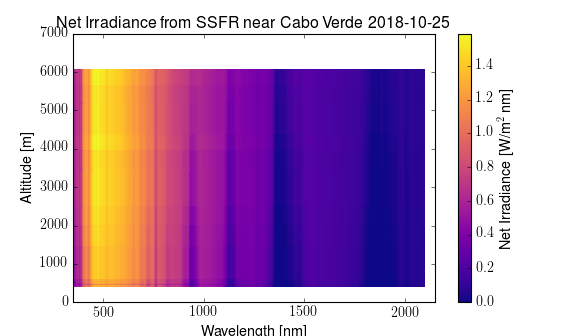

In [106]:
plt.figure()
pc = plt.pcolor(ssfr['zenlambda'],ssfr['alt'][is_ssfr],ssfr['f_net'][is_ssfr,:],cmap=plt.cm.plasma)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Altitude [m]')
plt.xlim(350,2150)
plt.title('Net Irradiance from SSFR near Cabo Verde 2018-10-25')
cb = plt.colorbar()
cb.set_label('Net Irradiance [W/m$^2$ nm]')


In [22]:
ssfr['alt'][is_ssfr]

array([6063.59256776, 6058.81272612, 6054.03288448, 6049.25304283,
       6043.99393863, 6038.75221235, 6033.51048606, 6028.26875978,
       6023.00902069, 6017.7672944 , 6012.52556812, 6007.26582903,
       5652.01251911, 5647.76336288, 5643.52875854, 5639.29415421,
       5634.69614948, 5630.08223263, 5625.48411686, 5620.88600109,
       5616.28788532, 5611.67396847, 5607.0758527 , 5602.47773693,
       5196.80804052, 5191.69889849, 5186.57411551, 5182.77190425,
       5178.969693  , 5175.16748174, 5171.35220447, 5167.54999322,
       5163.74778196, 5159.94557071, 5156.13029343, 5152.32808218,
       4370.98883756, 4366.59169965, 4362.19456173, 4357.78231338,
       4353.38517546, 4348.98803755, 4344.59089963, 4340.17865127,
       4335.78151336, 4331.38437544, 4326.98723753, 4322.57498917,
       3948.19924603, 3943.33259927, 3938.46595252, 3933.59930576,
       3928.71593513, 3923.84926435, 3918.80787448, 3913.74916025,
       3908.70777038, 3903.66638051, 3898.62499064, 3893.56627

## Now calculate the heating rate using the differential method

In [28]:
from Sp_parameters import deriv,smooth

In [29]:
ssfr['heat_r'] = np.zeros_like(ssfr['f_net'])

In [30]:
nb = 75
f_net = np.vstack([ssfr['f_net'][is_ssfr[0:nb],:]*0.0+ssfr['f_net'][is_ssfr[0],:],ssfr['f_net'][is_ssfr,:]])
f_net.shape

(219, 400)

In [31]:
iss_ssfr = np.hstack([range(is_ssfr[0]-nb,is_ssfr[0]),is_ssfr])

In [32]:
for l,w in enumerate(ssfr['zenlambda']):
    ssfr['heat_r'][iss_ssfr,l] = smooth(deriv(smooth(f_net[:,l],30,nan=False,old=True),
                                  ssfr['alt'][iss_ssfr]),9,nan=False,old=True) 

<IPython.core.display.Javascript object>


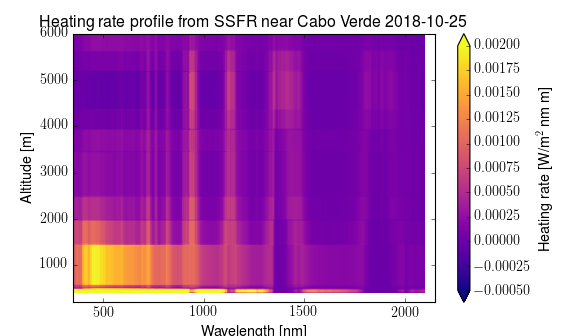

In [112]:
plt.figure()
pc = plt.pcolor(ssfr['zenlambda'],ssfr['alt'][is_ssfr],ssfr['heat_r'][is_ssfr,:],cmap=plt.cm.plasma,vmin=-0.0005,vmax=0.002)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Altitude [m]')
plt.xlim(350,2150)
plt.ylim(200,6000)
plt.title('Heating rate profile from SSFR near Cabo Verde 2018-10-25')
cb = plt.colorbar(extend='both')
cb.set_label('Heating rate [W/m$^2$ nm m]')

<IPython.core.display.Javascript object>


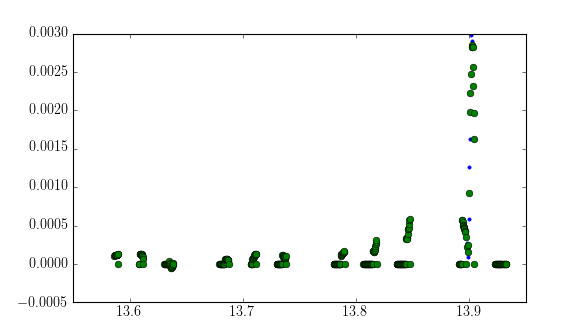

In [113]:
plt.figure()
plt.plot(ssfr['utc'][is_ssfr],ssfr['heat_r'][is_ssfr,200],'.')
plt.plot(ssfr['utc'][i_ssfr],ssfr['heat_r'][i_ssfr,200],'go')


## Now combine with other data

<IPython.core.display.Javascript object>


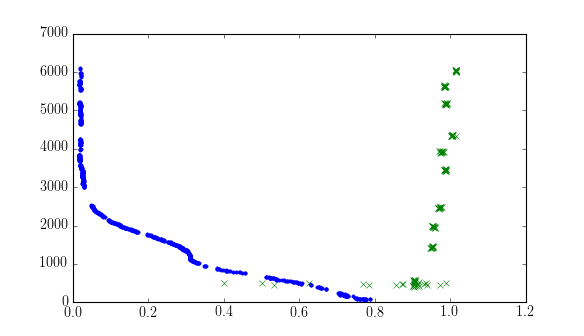

In [114]:
plt.figure()
plt.plot(s['AOD0501'][i_s],s['GPS_Alt'][i_s],'.')
plt.plot(ssfr['f_net'][is_ssfr,120],ssfr['alt'][is_ssfr],'x')

In [33]:
i_m = (mrg['Start_UTC']/3600.0>pfl[0]) & (mrg['Start_UTC']/3600.0<pfl[1])

In [116]:
mrg.keys()

['TwoDSdiameter',
 'RSP2-WTRCLD_Veff',
 'CDP_CH',
 'CDP_LasCur',
 'Day_Of_Year',
 'Sat_Vapor_Press_H2O',
 'IR_Surf_Temp',
 'Sys_RollAng',
 'UNCAOD',
 'Roll_Angle',
 'CDP_SamVol',
 'AOD',
 'CDP_RDisp',
 'King_LWC_ad',
 'CIP_PPress',
 'CDP_5VMoni',
 'HVPS3diameters',
 'WINDS_v_ms-1',
 'WINDS_w_ms-1',
 'SPP200TotIn',
 'True_Air_Speed',
 'AOD_angstrom_470_865',
 'RSP2-WTRCLD_Reff_unc',
 'RSP2-WTRCLD_COT_rad_2260',
 'CIP_TAS',
 'CDP_MedD',
 'Longitude',
 'Lat',
 'SPP200diameters',
 'Nt2DSH_all',
 'CDPdiameter',
 'SPP200SupTo',
 'Sys_PresAlt',
 'Sys_Temp',
 'RSP2-WTRCLD_COT',
 'Aircraft_Sun_Azimuth',
 'Potential_Temp',
 'WINDS_u_ms-1',
 'amass_aer',
 'CDP_LaserT',
 'Part_Press_Water_Vapor',
 'Pitch_Angle',
 'Pressure_Altitude',
 'NtHVPS3H1MM',
 'Sys_Lat',
 'Sys_GrdSpd',
 'Latitude',
 'RSP2-WTRCLD_Reff_rad_2260',
 'CDP_SamArea',
 'Wind_Speed',
 'Track_Angle',
 'Dew_Point',
 'time_bounds',
 'Sys_TAS',
 'Total_Air_Temp',
 'HVPS3H_CH',
 'Solar_Zenith_Angle',
 'Relative_Humidity',
 'SPP200TIMVC',

<IPython.core.display.Javascript object>


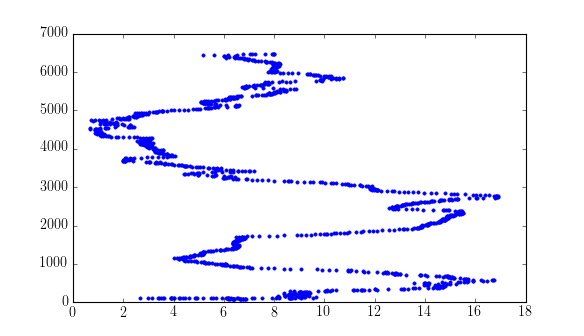

In [126]:
plt.figure()
plt.plot(mrg['WINDS_WSPD_ms-1'][i_m],mrg['GPS_Altitude'][i_m],'.')
#plt.plot(mrg['WINDS_w_ms-1'][i_m],mrg['GPS_Altitude'][i_m],'gx')

### Make the extinction coefficient

In [34]:
import scipy.interpolate as si

In [35]:
alt = mrg['GPS_Altitude'][i_m]

In [36]:
aod_fx =  si.interp1d(s['GPS_Alt'][i_s],s['AOD0501'][i_s],fill_value="extrapolate")
aod = aod_fx(mrg['GPS_Altitude'][i_m])

In [37]:
ext0501 = smooth(deriv(smooth(aod,30,nan=False,old=True),
                                  alt),9,nan=False,old=True)*-1.0

Sp_parameters.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  d[0] = y[0]*((x[0]-x[1])+(x[0]-x[2]))/((x[0]-x[1])*(x[0]-x[2])) -            y[1]*(x[0]-x[2])/((x[0]-x[1])*(x[1]-x[2])) +            y[2]*(x[0]-x[1])/((x[0]-x[2])*(x[1]-x[2]))
Sp_parameters.py:110: RuntimeWarning: invalid value encountered in double_scalars
  d[0] = y[0]*((x[0]-x[1])+(x[0]-x[2]))/((x[0]-x[1])*(x[0]-x[2])) -            y[1]*(x[0]-x[2])/((x[0]-x[1])*(x[1]-x[2])) +            y[2]*(x[0]-x[1])/((x[0]-x[2])*(x[1]-x[2]))
Sp_parameters.py:111: RuntimeWarning: invalid value encountered in double_scalars
  d[-1] = - y[-3]*(x[-2]-x[-1])/((x[-3]-x[-2])*(x[-3]-x[-1])) +             y[-2]*(x[-3]-x[-1])/((x[-3]-x[-2])*(x[-2]-x[-1])) -             y[-1]*((x[-3]-x[-1])+(x[-2]-x[-1]))/((x[-3]-x[-1])*(x[-2]-x[-1]))
Sp_parameters.py:113: RuntimeWarning: divide by zero encountered in double_scalars
  d[i] = y[i-1]*(x[i]-x[i+1])/((x[i-1]-x[i])*(x[i-1]-x[i+1])) +                y[i]*(1.0/(x[i]-x[i+1]) - 1.0

<IPython.core.display.Javascript object>


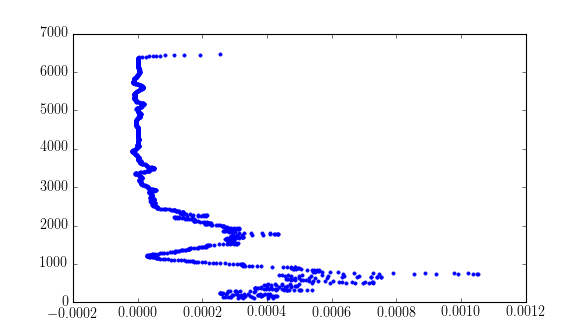

In [154]:
plt.figure()
plt.plot(ext0501,alt,'.')

In [35]:
mrg['amass_aer'][i_m]

masked_array(data=[1.1396484375, 1.1396484375, 1.1396484375, ...,
                   1.1572265625, 1.1572265625, 1.1572265625],
             mask=[False, False, False, ..., False, False, False],
       fill_value=-9999.0)

In [38]:
m_air = 28.9647
R = 287.05
rho = mrg['Static_Pressure']*100.0/(R*(mrg['Static_Air_Temp']+273.15))

In [37]:
rho[i_m]

masked_array(data=[0.6136292493928506, 0.6136292493928506,
                   0.6140844834517503, ..., 1.1679754537859837,
                   1.16831771130881, 1.1686086632976802],
             mask=[False, False, False, ..., False, False, False],
       fill_value=9.969209968386869e+36)

In [39]:
#rho=1.0
cp = 1004.0
inst_to_24h = 1.75
ssfr['heat_r_Kday'] = ssfr['heat_r']*inst_to_24h*3600*24/cp
ssfr['heat_r_Kday'] = ssfr['heat_r_Kday'].T/rho
ssfr['heat_r_Kday'] = ssfr['heat_r_Kday'].T

<IPython.core.display.Javascript object>


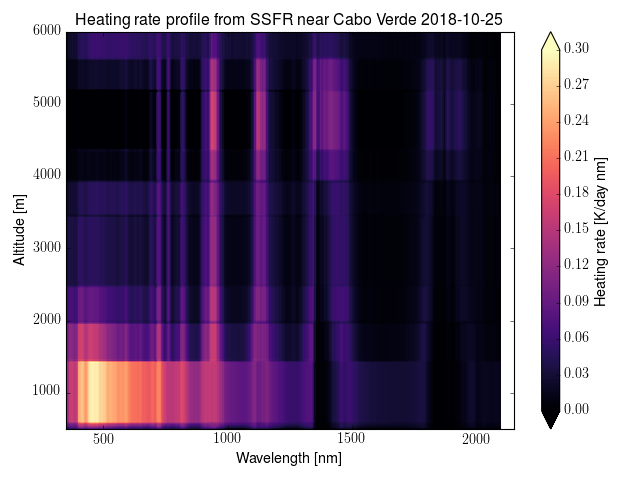

In [290]:
plt.figure(figsize=(8,6))
pc = plt.pcolor(ssfr['zenlambda'],ssfr['alt'][is_ssfr],ssfr['heat_r_Kday'][is_ssfr,:],cmap=plt.cm.magma,vmin=0,vmax=0.3)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Altitude [m]')
plt.xlim(350,2150)
plt.ylim(500,6000)
plt.title('Heating rate profile from SSFR near Cabo Verde 2018-10-25')
cb = plt.colorbar(extend='both')
cb.set_label('Heating rate [K/day nm]')
plt.tight_layout()
plt.savefig(fp+'plot/Heating_rate_Caboverde_20181025.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


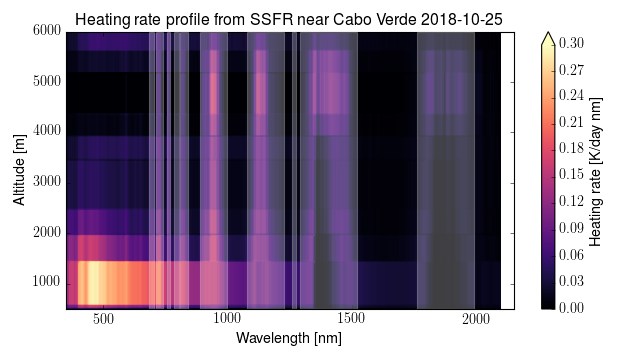

In [46]:
plt.figure(figsize=(8,4.5))
pc = plt.pcolor(ssfr['zenlambda'],ssfr['alt'][is_ssfr],ssfr['heat_r_Kday'][is_ssfr,:],cmap=plt.cm.magma,vmin=0,vmax=0.3)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Altitude [m]')
plt.xlim(350,2150)
plt.ylim(500,6000)
plt.title('Heating rate profile from SSFR near Cabo Verde 2018-10-25')
for rg in shade_rg:
    plt.axvspan(rg[0],rg[1],color='white',alpha=0.25,zorder=200)

cb = plt.colorbar(extend='max')
cb.set_label('Heating rate [K/day nm]')
plt.tight_layout()
plt.savefig(fp+'plot/Heating_rate_Caboverde_20181025_shaded.png',transparent=True,dpi=600)

In [40]:
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

<IPython.core.display.Javascript object>


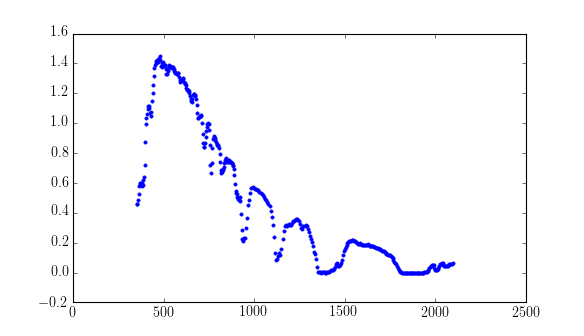

In [182]:
plt.figure()
plt.plot(ssfr['zenlambda'],ssfr['zenspectra'][is_ssfr[-1],:],'.')

In [41]:
# for water vapor:
shade_rg = [[684.0,705.0],
            [713.0,741.0],
            [756.0,770.0],
            [785.5,805.0],
            [810.0,842.0],
            [890.0,998.0],
            [1077.0,1228.0],
            [1257.0,1277.0],
            [1293.0,1521.0],
            [1760.0,1992.0]]

In [42]:
irg = [(ssfr['zenlambda']>rg[0]) & (ssfr['zenlambda']<rg[1]) for i,rg in enumerate(shade_rg)]

In [43]:
len(irg)

10

In [44]:
iwv = irg[0] | irg[1] | irg[2] | irg[3] | irg[4] | irg[5] | irg[6] | irg[7] | irg[8] | irg[9]

In [52]:
iwv

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False,

In [45]:
heating_r_wv = np.zeros_like(ssfr['utc'])
heating_r_aero = np.zeros_like(ssfr['utc'])
for i in is_ssfr:
    heating_r_wv[i] = np.trapz(ssfr['heat_r_Kday'][i,iwv],x=ssfr['zenlambda'][iwv])
    heating_r_aero[i] = np.trapz(ssfr['heat_r_Kday'][i,~iwv],x=ssfr['zenlambda'][~iwv])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Warning: converting a masked element to nan.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Warning: converting a masked element to nan.
  """


<IPython.core.display.Javascript object>


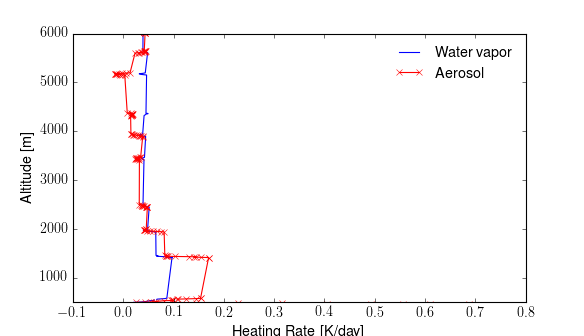

In [54]:
plt.figure()
plt.plot(heating_r_wv[is_ssfr]/1000.0,ssfr['alt'][is_ssfr],'-',label='Water vapor')
plt.plot(heating_r_aero[is_ssfr]/1000.0,ssfr['alt'][is_ssfr],'r-x',label='Aerosol')
plt.ylim(500,6000)
plt.legend(frameon=False)
plt.ylabel('Altitude [m]')
plt.xlabel('Heating Rate [K/day]')

In [46]:
def interp_spline2(xold, yold, xnew,k=5):
    uv = UnivariateSpline(xold,yold,ext=0,k=k)
    return uv(xnew)

In [47]:
alt_id = np.arange(0,6200)

In [48]:
igs =  np.isfinite(heating_r_wv[is_ssfr])

In [49]:
H_wv = interp_spline2(ssfr['alt'][is_ssfr[igs]][-1:0:-1],heating_r_wv[is_ssfr[igs]][-1:0:-1]/100.0,alt_id,k=4)
H_aero = interp_spline2(ssfr['alt'][is_ssfr[igs]][-1:0:-1],heating_r_aero[is_ssfr[igs]][-1:0:-1]/100.0,alt_id,k=4)

<IPython.core.display.Javascript object>


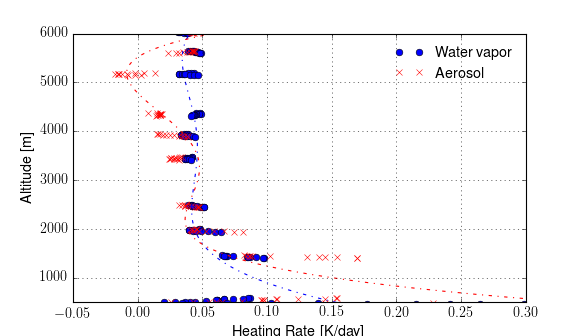

In [59]:
plt.figure()
plt.plot(heating_r_wv[is_ssfr]/1000.0,ssfr['alt'][is_ssfr],'o',label='Water vapor')
plt.plot(heating_r_aero[is_ssfr]/1000.0,ssfr['alt'][is_ssfr],'rx',label='Aerosol')
plt.plot(H_wv,alt_id,'b-.')
plt.plot(H_aero,alt_id,'r-.')
plt.ylim(500,6000)
plt.xlim(-0.05,0.3)
plt.legend(frameon=False)
plt.ylabel('Altitude [m]')
plt.xlabel('Heating Rate [K/day]')
plt.grid()

<IPython.core.display.Javascript object>


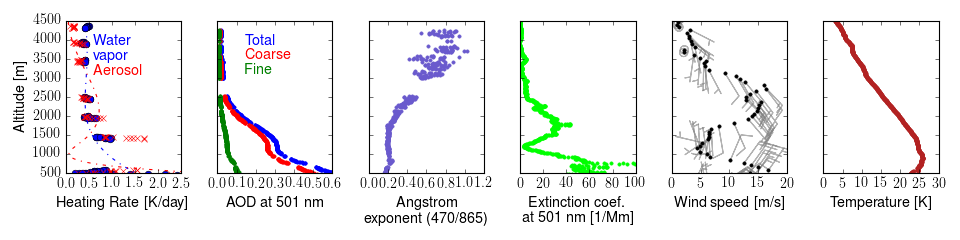

In [80]:
fig = plt.figure(figsize=(12,3))

ax1 = plt.subplot2grid((1,6),(0,0))
ax1.plot(heating_r_wv[is_ssfr]/100.0,ssfr['alt'][is_ssfr],'o',label='Water\nvapor')
ax1.plot(heating_r_aero[is_ssfr]/100.0,ssfr['alt'][is_ssfr],'rx',label='Aerosol')
ax1.plot(H_wv,alt_id,'b-.')
ax1.plot(H_aero,alt_id,'r-.')
ax1.set_ylabel('Altitude [m]')
ax1.set_ylim(500,4500)
ax1.set_xlim(0,2.5)
leg = ax1.legend(frameon=False,loc=2,numpoints=1,markerscale=0,handlelength=0.2,labelspacing=0.1)
for line,text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
    line.set_linewidth(5.0)
ax1.set_xlabel('Heating Rate [K/day]')
#plt.setp(ax1.get_yticklabels(), visible=False)

ax0 = plt.subplot2grid((1,6),(0,1),sharey=ax1)
ax0.plot(s['AOD0501'][i_s],s['GPS_Alt'][i_s],'.',label='Total')
plt.plot(fmf['tauc'][fmf['iq']],s['GPS_Alt'][fmf['iq']],'r.',label='Coarse')
plt.plot(fmf['tauf'][fmf['iq']],s['GPS_Alt'][fmf['iq']],'g.',label='Fine')
ax0.set_xlabel('AOD at 501 nm')
ax0.set_xlim(0,0.6)
leg = ax0.legend(frameon=False,loc=2,numpoints=1,markerscale=0,handlelength=0.2,labelspacing=0.1)
for line,text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
    line.set_linewidth(5.0)
plt.setp(ax0.get_yticklabels(), visible=False)

ax2 = plt.subplot2grid((1,6),(0,2),sharey=ax1)
ax2.plot(s['AOD_angstrom_470_865'][i_s],s['GPS_Alt'][i_s],'.',color='slateblue')
ax2.set_xlabel('Angstrom\nexponent (470/865)')
plt.setp(ax2.get_yticklabels(), visible=False)

ax3 = plt.subplot2grid((1,6),(0,3),sharey=ax1)
ax3.plot(ext0501*100000.0,alt,'.',color='lime',label='4STAR')
#ax3.plot(hsrl['ext'][2429,:]*100.0,hsrl['alt'].T,'.',color='m',label='HSRL2')
ax3.set_xlabel('Extinction coef.\nat 501 nm [1/Mm]')
#leg = ax3.legend(frameon=False,loc=5,numpoints=1,markerscale=0,handlelength=0.2,labelspacing=0.1)
#for line,text in zip(leg.get_lines(), leg.get_texts()):
#    text.set_color(line.get_color())
#    line.set_linewidth(5.0)
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_xlim(0,100)



ax5 = plt.subplot2grid((1,6),(0,4),sharey=ax1)

ax5.plot(mrg['WINDS_WSPD_ms-1'][i_m][0:-1:15],mrg['GPS_Altitude'][i_m][0:-1:15],'ko',markersize=3)
ax5.barbs(mrg['WINDS_WSPD_ms-1'][i_m][0:-1:15],mrg['GPS_Altitude'][i_m][0:-1:15],
          mrg['WINDS_u_ms-1'][i_m][0:-1:15],mrg['WINDS_v_ms-1'][i_m][0:-1:15],alpha=0.6,color='grey')
ax5.set_xlabel('Wind speed [m/s]')
ax5.set_xlim(0,20)
plt.setp(ax5.get_yticklabels(), visible=False)

ax6 = plt.subplot2grid((1,6),(0,5),sharey=ax1)
ax6.plot(mrg['Static_Air_Temp'][i_m],mrg['GPS_Altitude'][i_m],'.',color='firebrick')
ax6.set_xlabel('Temperature [K]')
ax6.set_xlim(0,30)
plt.setp(ax6.get_yticklabels(), visible=False)

ax6.set_ylim(500,4500)
plt.tight_layout()

plt.savefig(fp+'plot/multipanel_heatingrate_20181025_CaboVerde.png',dpi=600,transparent=True)

Make some potential temperature figures

<IPython.core.display.Javascript object>


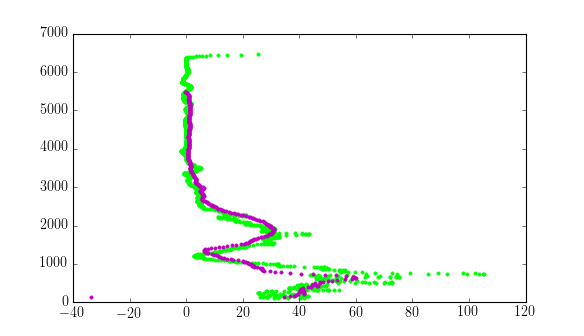

In [139]:
plt.figure()
plt.plot(ext0501*100000.0,alt,'.',color='lime',label='4STAR')
plt.plot(hsrl['ext'][2419,:]*100.0,hsrl['alt'].T,'.',color='m',label='HSRL2')

In [51]:
pot_temp = mrg['Static_Air_Temp']*(mrg['Static_Pressure']/1013.0)**(0.286)

<IPython.core.display.Javascript object>


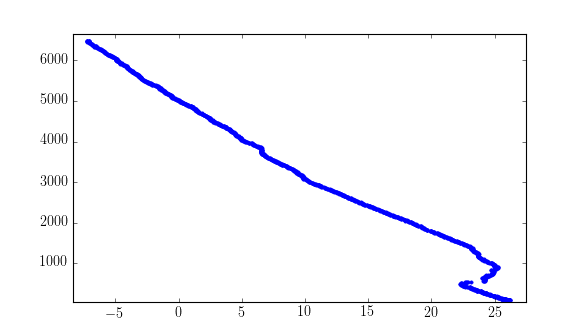

In [292]:
plt.figure()
plt.plot(pot_temp[i_m],mrg['GPS_Altitude'][i_m],'.')

In [52]:
import sun_utils as su

In [53]:
ka = s.dtype.names

In [54]:
kk = list(ka)

In [55]:
kk.sort()

In [56]:
kk

['AOD0355',
 'AOD0380',
 'AOD0452',
 'AOD0470',
 'AOD0501',
 'AOD0520',
 'AOD0530',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0660',
 'AOD0675',
 'AOD0700',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1250',
 'AOD1559',
 'AOD1627',
 'AOD1650',
 'AOD_angstrom_470_865',
 'AOD_polycoef_a0',
 'AOD_polycoef_a1',
 'AOD_polycoef_a2',
 'GPS_Alt',
 'Latitude',
 'Longitude',
 'Start_UTC',
 'UNCAOD0355',
 'UNCAOD0380',
 'UNCAOD0452',
 'UNCAOD0470',
 'UNCAOD0501',
 'UNCAOD0520',
 'UNCAOD0530',
 'UNCAOD0532',
 'UNCAOD0550',
 'UNCAOD0606',
 'UNCAOD0620',
 'UNCAOD0660',
 'UNCAOD0675',
 'UNCAOD0700',
 'UNCAOD0781',
 'UNCAOD0865',
 'UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1250',
 'UNCAOD1559',
 'UNCAOD1627',
 'UNCAOD1650',
 'amass_aer',
 'flag_acaod',
 'qual_flag']

In [57]:
nwl = kk[0:23]

In [58]:
nm = [355.0,380.0,452.0,470.0,501.0,520.0,530.0,532.0,550.0,606.0,620.0,660.0,675.0,700.0,781.0,865.0,1020.0,1040.0,1064.0,1236.0,1250.0,1559.0,1627.0,1650.0]

In [59]:
aodrr = np.array([s[n] for n in nwl])

In [60]:
fmf = su.sda(aodrr[1:13,:],np.array(nm[1:13])/1000.0)

HBox(children=(IntProgress(value=0, max=26845), HTML(value=u'')))

Sun_utils.py:418: RuntimeWarning: invalid value encountered in log
  cc = polyfit(np.log(wvl),np.log(aod),polynum)


In [61]:
fmf.keys()

['tauc', 'alphap', 'tauf', 'tau', 'poly', 'eta', 'alpha']

In [62]:
fmf['iq'] = (s['Start_UTC']>pfl[0]) & (s['Start_UTC']<pfl[1]) & (s['qual_flag']==0) & (np.isfinite(fmf['tauf'])) & (np.isfinite(fmf['tauc']))

In [63]:
s['Start_UTC'].shape

(26843,)

In [64]:
fmf['tauc'].shape

(26843,)

<IPython.core.display.Javascript object>


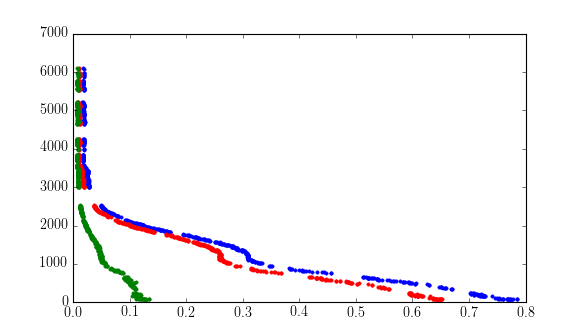

In [96]:
plt.figure()
plt.plot(fmf['tau'][i_s],s['GPS_Alt'][i_s],'.')
plt.plot(fmf['tauc'][fmf['iq']],s['GPS_Alt'][fmf['iq']],'r.')
plt.plot(fmf['tauf'][fmf['iq']],s['GPS_Alt'][fmf['iq']],'g.')

In [102]:
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'